In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramimahmed222115141","key":"47cd59d496143011d5f83c94e6af2083"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle --version

Kaggle API 1.6.17


In [7]:
!kaggle datasets download -d yasserh/student-marks-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/student-marks-dataset
License(s): CC0-1.0
  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 1.84MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('student-marks-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [13]:
Data = pd.read_csv("/content/data_folder/Student_Marks.csv")

In [14]:
Data.sort_values(by=['number_courses'], inplace=True)
print(Data)

    number_courses  time_study   Marks
0                3       4.508  19.202
96               3       0.301   5.609
87               3       1.033   6.053
79               3       0.805   6.349
75               3       0.803   6.217
..             ...         ...     ...
59               8       7.468  51.343
56               8       7.641  53.359
54               8       7.591  53.158
85               8       6.201  39.957
17               8       6.080  38.490

[100 rows x 3 columns]


In [15]:
print(statistics.mean(Data.Marks))

24.41769


In [16]:
Pass_or_Fail = []
for row in Data['Marks']:
    if row <= 25.0 :
        Pass_or_Fail.append(0)
    else:
        Pass_or_Fail.append(1)
Data['Pass_or_Fail'] =Pass_or_Fail
print(Data)

    number_courses  time_study   Marks  Pass_or_Fail
0                3       4.508  19.202             0
96               3       0.301   5.609             0
87               3       1.033   6.053             0
79               3       0.805   6.349             0
75               3       0.803   6.217             0
..             ...         ...     ...           ...
59               8       7.468  51.343             1
56               8       7.641  53.359             1
54               8       7.591  53.158             1
85               8       6.201  39.957             1
17               8       6.080  38.490             1

[100 rows x 4 columns]


In [17]:
x = Data.iloc[:,1:2].values
y = Data.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [19]:
y_train.reshape(len(y_train),1);

<Axes: xlabel='time_study', ylabel='Pass_or_Fail'>

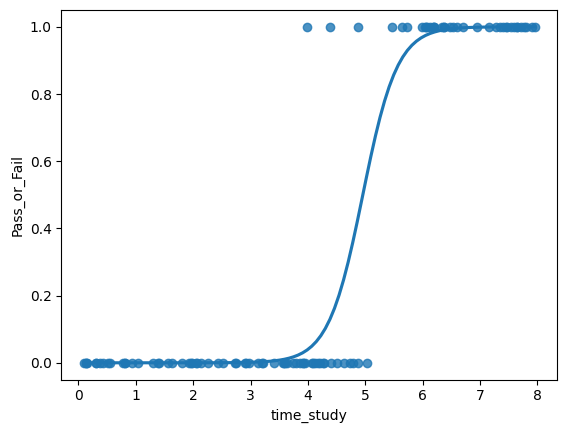

In [20]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
reg = LogisticRegression(random_state = 0)
reg.fit(x_train, y_train)
y_predict = reg.predict (x_test)
sns.regplot(x = 'time_study', y = 'Pass_or_Fail', data = Data, logistic=True, ci=None)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test, y_predict)

[[15  1]
 [ 0  9]]


0.96